In [8]:
#importing the required dependencies 
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

### Text files to CSV

In [9]:
#converting the provided text files to csv for analysis
read_file = pd.read_csv (r'text_files/Attributes.txt')
read_file.to_csv (r'csv_files/Attributes.csv', index=None)

read_file = pd.read_csv (r'text_files/GasDemand.txt')
read_file.to_csv (r'csv_files/GasDemand.csv', index=None)

read_file = pd.read_csv (r'text_files/Weather.txt')
read_file.to_csv (r'csv_files/Weather.csv', index=None)

 ### Read CSV into dataframe and display

In [10]:
#weather csv into df
weather_df = pd.read_csv('csv_files/Weather.csv')
print (weather_df)
print (f"\nDataypes:\n{weather_df.dtypes}")

    GAS_FLOW_DAY GEO_LOCATION   CWV
0     01/04/2019           SC  5.65
1     01/04/2019           WM  8.18
2     02/04/2019           SC  5.14
3     02/04/2019           WM  6.47
4     03/04/2019           SC  4.21
..           ...          ...   ...
727   29/03/2020           WM  4.98
728   30/03/2020           SC  6.45
729   30/03/2020           WM  5.39
730   31/03/2020           SC  6.57
731   31/03/2020           WM  6.14

[732 rows x 3 columns]

Dataypes:
GAS_FLOW_DAY     object
GEO_LOCATION     object
CWV             float64
dtype: object


In [11]:
#attributes into df
attributes_df = pd.read_csv('csv_files/Attributes.csv')
print (attributes_df.head())
print (f"\nDataypes:\n{attributes_df.dtypes}")


  SITE_REFERENCE GEO_LOCATION MARKET_SECTOR_IDENTIFIER  ANNUAL_USAGE
0           WM01           WM                        D          2764
1           SC01           SC                        D          4980
2           SC02           SC                        D          5987
3           WM02           WM                        D          7021
4           SC03           SC                        D          8189

Dataypes:
SITE_REFERENCE              object
GEO_LOCATION                object
MARKET_SECTOR_IDENTIFIER    object
ANNUAL_USAGE                 int64
dtype: object


In [12]:
#Gasdemand into df
gasdemand_df = pd.read_csv('csv_files/Gasdemand.csv')
print(gasdemand_df)
print(f"\nDataypes:\n{gasdemand_df.dtypes}")

      SITE_REFERENCE GAS_FLOW_DAY  ENERGY_VALUE
0               SC01   01/04/2019          0.00
1               SC01   02/04/2019          0.00
2               SC01   03/04/2019          0.00
3               SC01   04/04/2019          0.00
4               SC01   05/04/2019         10.93
...              ...          ...           ...
18235           WM25   27/03/2020      41580.00
18236           WM25   28/03/2020      33246.00
18237           WM25   29/03/2020      37335.00
18238           WM25   30/03/2020      49265.00
18239           WM25   31/03/2020      44986.00

[18240 rows x 3 columns]

Dataypes:
SITE_REFERENCE     object
GAS_FLOW_DAY       object
ENERGY_VALUE      float64
dtype: object


### Finding Null and Duplicates 

In [13]:
weather_null = weather_df[weather_df.isna().any(axis=1)]
weather_null


,GAS_FLOW_DAY,GEO_LOCATION,CWV


In [14]:
weather_dup = weather_df[weather_df.duplicated(keep=False)]
weather_dup

,GAS_FLOW_DAY,GEO_LOCATION,CWV


#### Comments-No Null and Duplicates in weather_df 

In [15]:
attributes_null= attributes_df[attributes_df.isna().any(axis=1)]
attributes_null

,SITE_REFERENCE,GEO_LOCATION,MARKET_SECTOR_IDENTIFIER,ANNUAL_USAGE


In [16]:
attributes_dup = attributes_df[attributes_df.duplicated(keep=False)]
attributes_dup

,SITE_REFERENCE,GEO_LOCATION,MARKET_SECTOR_IDENTIFIER,ANNUAL_USAGE


#### Comments-No Null and Duplicates in attributes_df 

In [17]:
#finding null values 
gasdemands_null=gasdemand_df[gasdemand_df.isna().any(axis=1)]
gasdemands_null

,SITE_REFERENCE,GAS_FLOW_DAY,ENERGY_VALUE


In [18]:
#finding duplicates
gasdemand_dup =gasdemand_df[gasdemand_df.duplicated(keep=False)]
gasdemand_dup

,SITE_REFERENCE,GAS_FLOW_DAY,ENERGY_VALUE
296,SC01,22/01/2020,0.00
297,SC01,22/01/2020,0.00
9503,WM02,07/04/2019,11.04
9504,WM02,07/04/2019,11.04
9508,WM02,12/04/2019,11.02
9509,WM02,12/04/2019,11.02
9510,WM02,12/04/2019,11.02
9511,WM02,12/04/2019,11.02
9838,WM02,07/03/2020,22.40
9839,WM02,07/03/2020,22.40


In [19]:
#dropping the duplicates
gasdemand_df=gasdemand_df.drop_duplicates()

In [20]:
# checking for duplicates after drop
gasdemand_dup2 =gasdemand_df[gasdemand_df.duplicated(keep=False)]
gasdemand_dup2

,SITE_REFERENCE,GAS_FLOW_DAY,ENERGY_VALUE


#### Comments - No Null in gasdemand_df but it has duplicates which are dropped 

### Merging the dataframes 

In [21]:
# merging weather_df and attributes_df
join1_df=pd.merge(weather_df,attributes_df,how='inner')
join1_df

,GAS_FLOW_DAY,GEO_LOCATION,CWV,SITE_REFERENCE,MARKET_SECTOR_IDENTIFIER,ANNUAL_USAGE
0,01/04/2019,SC,5.65,SC01,D,4980
1,01/04/2019,SC,5.65,SC02,D,5987
2,01/04/2019,SC,5.65,SC03,D,8189
3,01/04/2019,SC,5.65,SC04,D,8441
4,01/04/2019,SC,5.65,SC05,D,14938
...,...,...,...,...,...,...
18295,31/03/2020,WM,6.14,WM21,I,11057895
18296,31/03/2020,WM,6.14,WM22,I,11595710
18297,31/03/2020,WM,6.14,WM23,I,11604373
18298,31/03/2020,WM,6.14,WM24,I,12809828


In [22]:
#final merge 
join_final=pd.merge(join1_df,gasdemand_df,how= 'outer')
join_final

,GAS_FLOW_DAY,GEO_LOCATION,CWV,SITE_REFERENCE,MARKET_SECTOR_IDENTIFIER,ANNUAL_USAGE,ENERGY_VALUE
0,01/04/2019,SC,5.65,SC01,D,4980,0.00
1,01/04/2019,SC,5.65,SC02,D,5987,27.77
2,01/04/2019,SC,5.65,SC03,D,8189,0.00
3,01/04/2019,SC,5.65,SC04,D,8441,95.29
4,01/04/2019,SC,5.65,SC05,D,14938,45.44
...,...,...,...,...,...,...,...
18297,31/03/2020,WM,6.14,WM21,I,11057895,18655.00
18298,31/03/2020,WM,6.14,WM22,I,11595710,29870.00
18299,31/03/2020,WM,6.14,WM23,I,11604373,48279.00
18300,31/03/2020,WM,6.14,WM24,I,12809828,49046.00


In [23]:
#Checking for duplicates in final dataframe 
join_final_dup = join_final[join_final.duplicated()]
join_final_dup

,GAS_FLOW_DAY,GEO_LOCATION,CWV,SITE_REFERENCE,MARKET_SECTOR_IDENTIFIER,ANNUAL_USAGE,ENERGY_VALUE


In [24]:
#checking for null values in merged dataframe
join_final_null= join_final[join_final.isnull().any(axis=1)]
join_final_null

,GAS_FLOW_DAY,GEO_LOCATION,CWV,SITE_REFERENCE,MARKET_SECTOR_IDENTIFIER,ANNUAL_USAGE,ENERGY_VALUE
4108,12/09/2019,SC,12.64,SC09,D,35211,NaN
4133,13/09/2019,SC,12.51,SC09,D,35211,NaN
4158,14/09/2019,SC,12.56,SC09,D,35211,NaN
4183,15/09/2019,SC,12.19,SC09,D,35211,NaN
4208,16/09/2019,SC,11.78,SC09,D,35211,NaN
...,...,...,...,...,...,...,...
17470,27/02/2020,WM,2.83,WM19,I,7778046,NaN
17495,28/02/2020,WM,3.29,WM19,I,7778046,NaN
17520,29/02/2020,WM,3.75,WM19,I,7778046,NaN
17545,01/03/2020,WM,3.98,WM19,I,7778046,NaN


In [25]:
#dropping the final values 
join_final = join_final.dropna()
join_final_null1= join_final[join_final.isnull().any(axis=1)]
join_final_null1

,GAS_FLOW_DAY,GEO_LOCATION,CWV,SITE_REFERENCE,MARKET_SECTOR_IDENTIFIER,ANNUAL_USAGE,ENERGY_VALUE


In [53]:
join_final['ENERGY_VALUE'].min()

-216.0

In [26]:
#saving final dataframe as csv
join_final.to_csv('csv_files/joined_data.csv')

In [27]:
#Summary of CWV,ANNUAL_USAGE and ENERGY_VALUE in the dataframe
join_final.describe()

,CWV,ANNUAL_USAGE,ENERGY_VALUE
count,18234.000000,1.823400e+04,18234.000000
mean,8.767369,4.255996e+06,11524.068661
std,4.371123,4.750848e+06,15825.935460
min,0.180000,2.764000e+03,-216.000000
25%,4.660000,1.635800e+04,32.250000
50%,8.750000,6.789900e+04,201.415000
75%,13.300000,7.778046e+06,21682.500000
max,14.900000,1.402348e+07,103936.000000


## Finding Outliers using Boxplot
-------------------------------------------------

### Scotland

In [28]:
#For the final dataframe after join/merge finding outliers in the numerical data columns using seaborn boxplot
#grouping the scoatland and west midland seperatley to have a clear picture 
grouped_geoloc = join_final.groupby('GEO_LOCATION')
grouped_sc = grouped_geoloc.get_group('SC')
grouped_sc.head()

,GAS_FLOW_DAY,GEO_LOCATION,CWV,SITE_REFERENCE,MARKET_SECTOR_IDENTIFIER,ANNUAL_USAGE,ENERGY_VALUE
0,01/04/2019,SC,5.65,SC01,D,4980,0.00
1,01/04/2019,SC,5.65,SC02,D,5987,27.77
2,01/04/2019,SC,5.65,SC03,D,8189,0.00
3,01/04/2019,SC,5.65,SC04,D,8441,95.29
4,01/04/2019,SC,5.65,SC05,D,14938,45.44


c:\users\arune\anaconda3\envs\datacoursepython\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


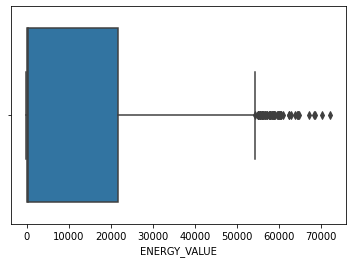

In [77]:
sns.boxplot(grouped_sc['ENERGY_VALUE'])
plt.savefig('plot_images/EnergyValue_Boxplot.png')

#### Comments - The outliers in the Energy_Value seems to be a lot and are concentrated after the value of 60000. As these are a number of values I did further analysis and below is the scatter plot of ENERGY_VALUE vs SITE_REFERENCE.

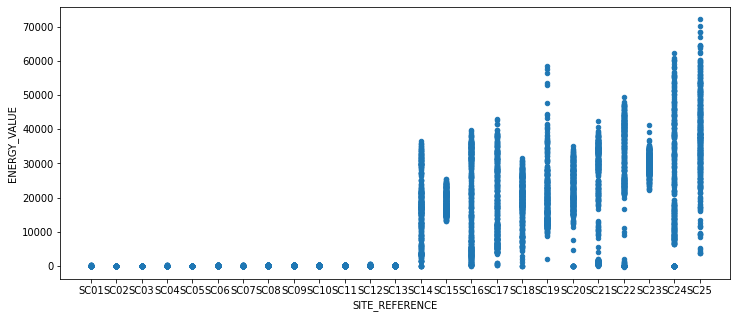

In [76]:
scatter1 = grouped_sc.plot.scatter( 'SITE_REFERENCE' , 'ENERGY_VALUE' ,figsize=(12, 5))
plt.savefig('plot_images/EnergyValue_scatter.png')

#### Comments - The Energy_Value seems to be dependent on Sites and hence the outliers can't be ignored in the data

c:\users\arune\anaconda3\envs\datacoursepython\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


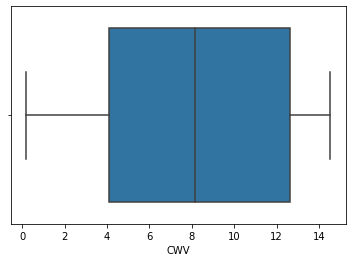

In [31]:
sns.boxplot(grouped_sc['CWV'])
plt.savefig('plot_images/CWV_Boxplot.png')

#### Comments - No Outliers detected in CWV data. 

c:\users\arune\anaconda3\envs\datacoursepython\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


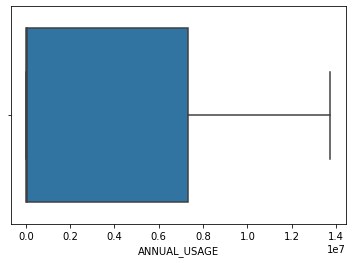

In [32]:
sns.boxplot(grouped_sc['ANNUAL_USAGE'])
plt.savefig('plot_images/ANNUAL_USAGE_Boxplot.png')

#### Comments - No oultler detected as annual consumption sitewise seems to be steady

### West Midlands

In [33]:
#For the final dataframe after join/merge finding outliers in the numerical data columns using seaborn boxplot
#grouping the scoatland and west midland seperatley to have a clear picture
#westmidalnds outliers

grouped_wm = grouped_geoloc.get_group('WM')
grouped_wm.head()

,GAS_FLOW_DAY,GEO_LOCATION,CWV,SITE_REFERENCE,MARKET_SECTOR_IDENTIFIER,ANNUAL_USAGE,ENERGY_VALUE
9152,01/04/2019,WM,8.18,WM01,D,2764,6.96
9153,01/04/2019,WM,8.18,WM02,D,7021,11.07
9154,01/04/2019,WM,8.18,WM03,D,8192,20.56
9155,01/04/2019,WM,8.18,WM04,D,9114,26.26
9156,01/04/2019,WM,8.18,WM05,D,9416,30.37


c:\users\arune\anaconda3\envs\datacoursepython\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


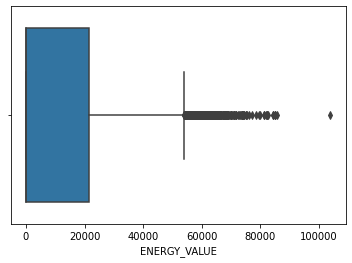

In [34]:
sns.boxplot(grouped_wm['ENERGY_VALUE'])
plt.savefig('plot_images/energyvalue_wm.png')

#### Comments-As there seem to be outliers in this case to visualise the ouliers more clearly and have an idea of what sites is it on a scatter plot is plotted below

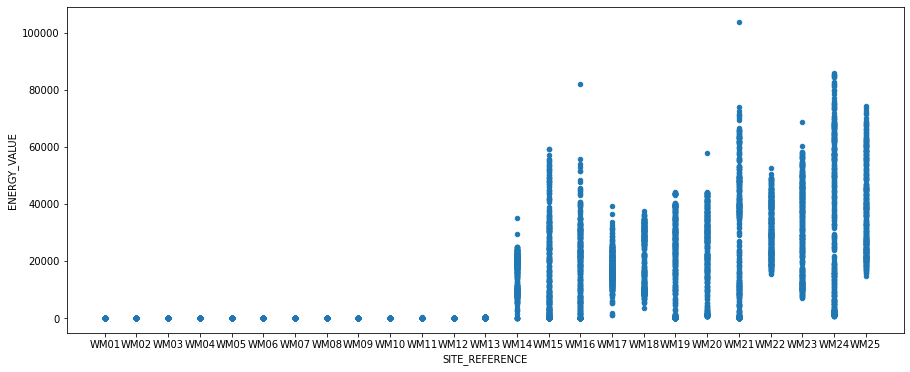

In [35]:
grouped_wm.plot.scatter( 'SITE_REFERENCE' , 'ENERGY_VALUE' ,figsize=(15,6))
plt.savefig('plot_images/energyvaluescatter_wm.png')

#### Comments- As there are some outliers that seem to have extreme value in the case of WM20,WM21 and WM15 as can be seen from the scatter plot. Further analysis using inter-quartile is done to find exact outliers 

In [36]:
# Using IQR for Outliers
Q1 = np.percentile(grouped_wm['ENERGY_VALUE'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(grouped_wm['ENERGY_VALUE'], 75,
                   interpolation = 'midpoint')

IQR = Q3 - Q1
IQR 

21565.16

In [37]:
# Above Upper bound
upper=(Q3+1.5*IQR)
upper_bound = grouped_wm['ENERGY_VALUE'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper_bound))
print(len(upper_bound))

Upper bound: 53938.24
(array([  20,   24,   40,   45,   49,   70,   74,   90,   94,   95,   97,
         98,   99,  194,  219,  223,  244,  248,  269,  273,  586,  955,
       4611, 5236, 5239, 5240, 5261, 5264, 5265, 5286, 5289, 5311, 5314,
       5339, 5364, 5461, 5564, 5586, 5589, 5590, 5611, 5614, 5615, 5636,
       5639, 5640, 5661, 5664, 5665, 5689, 5714, 5739, 5761, 5764, 5765,
       5786, 5789, 5790, 5814, 5815, 5836, 5839, 5840, 5864, 5889, 5914,
       5939, 5964, 5989, 6014, 6038, 6039, 6040, 6064, 6089, 6111, 6114,
       6115, 6136, 6139, 6140, 6161, 6164, 6165, 6189, 6190, 6214, 6239,
       6264, 6286, 6289, 6290, 6314, 6315, 6336, 6339, 6340, 6364, 6365,
       6389, 6414, 6439, 6461, 6464, 6465, 6486, 6489, 6490, 6514, 6515,
       6539, 6564, 6589, 6614, 6639, 6664, 6689, 6714, 6739, 6764, 6789,
       6814, 6839, 6864, 6889, 6890, 6914, 6915, 6939, 6964, 6989, 6990,
       7014, 7039, 7064, 7065, 7089, 7090, 7161, 7164, 7165, 7189, 7190,
       7214, 7215, 7239, 724

In [38]:
 # Below Lower bound
lower = (Q1-1.5*IQR)
lower_bound = grouped_wm['ENERGY_VALUE'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

Lower bound: -32322.399999999998
(array([0], dtype=int64),)


#### Comments - There are a significant number of upper bound outliers in the data and hence can't be deleted as that might skew the dataset. It seems that might be site dependent and the outlier analysis cannot be concluded without more information. No outliers are found in lower bound 

c:\users\arune\anaconda3\envs\datacoursepython\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


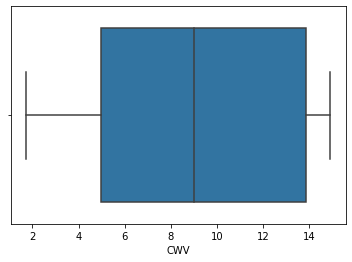

In [39]:
sns.boxplot(grouped_wm['CWV'])
plt.savefig('plot_images/CWVwm_Boxplot.png')

#### Comments - No outliers deteceted 

c:\users\arune\anaconda3\envs\datacoursepython\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


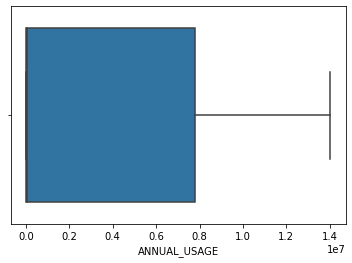

In [40]:
sns.boxplot(grouped_wm['ANNUAL_USAGE'])
plt.savefig('plot_images/ANNUAL_USAGEwm_Boxplot.png')

#### Comments - No outliers deteceted 

### Highest and Lowest value of Annual Usage , CWV and Average Energy Value 

In [41]:
# Using attributes_df for finding sites with Highest and Lowest value of Annual Usage  
max_au = attributes_df['ANNUAL_USAGE'].max()
site_max=attributes_df.loc[attributes_df['ANNUAL_USAGE']== max_au ,'SITE_REFERENCE']
min_au = attributes_df['ANNUAL_USAGE'].min()
site_min=attributes_df.loc[attributes_df['ANNUAL_USAGE']== min_au ,'SITE_REFERENCE']
print(f"Site with maximum annual usage in the given time frame is {site_max[49]} and the value is\
 {max_au}")
print(f"Site with minimum annual usage in the given time frame is {site_min[0]} and the value is\
 {min_au}")

Site with maximum annual usage in the given time frame is WM25 and the value is 14023483
Site with minimum annual usage in the given time frame is WM01 and the value is 2764


In [62]:
#Using weather_df to find the maximum and minimum CWV
max_cwv = weather_df['CWV'].max()
day_max=weather_df.loc[weather_df['CWV']== max_cwv ,'GAS_FLOW_DAY']
min_cwv = weather_df['CWV'].min()
day_min=weather_df.loc[weather_df['CWV']== min_cwv ,'GAS_FLOW_DAY']
print(f"maximum CWV in the given time frame is {max_cwv} on following days \n{day_max.reset_index(drop=True)}")
print(f"minimum CWV in the given time frame is {min_cwv} on following days {day_min[488]}")

maximum CWV in the given time frame is 14.9 on following days 
0     29/06/2019
1     30/06/2019
2     05/07/2019
3     17/07/2019
4     22/07/2019
5     23/07/2019
6     24/07/2019
7     25/07/2019
8     26/07/2019
9     27/07/2019
10    29/07/2019
11    02/08/2019
12    03/08/2019
13    04/08/2019
14    05/08/2019
15    08/08/2019
16    09/08/2019
17    24/08/2019
18    25/08/2019
19    26/08/2019
20    27/08/2019
Name: GAS_FLOW_DAY, dtype: object
minimum CWV in the given time frame is 0.18 on following days 01/12/2019


In [68]:
# Using join_final dataframe to find Maximum and minimum Energy Value 
ENERGY_VALUE = join_final['ENERGY_VALUE'].max()
max_ev= join_final['ENERGY_VALUE'].max()
site_max1=join_final.loc[join_final['ENERGY_VALUE']== ENERGY_VALUE ,'SITE_REFERENCE']
min_ev = join_final['ENERGY_VALUE'].min()
site_min1=join_final.loc[join_final['ENERGY_VALUE']== min_ev ,'SITE_REFERENCE']
print(f"maximum ENERGY_VALUE in the given time frame is {max_ev} for the site \n{site_max1}")
print(f"minimum ENERGY_VALUE in the given time frame is {min_ev} for the site \n{site_min1}")

maximum ENERGY_VALUE in the given time frame is 103936.0 for the site 
9247    WM21
Name: SITE_REFERENCE, dtype: object
minimum ENERGY_VALUE in the given time frame is -216.0 for the site 
2446    SC22
Name: SITE_REFERENCE, dtype: object


## Relation between CWV and Annual Usage and Energy Value 

## Scotland

### Relation between CWV Vs Energy_Value 

In [44]:
#finding average value to find correlation and plotting
ev_daily = grouped_sc.groupby('GAS_FLOW_DAY')['ENERGY_VALUE'].mean()
cwv_daily = grouped_sc.groupby('GAS_FLOW_DAY')['CWV'].mean()
print(f"Correlation factor for CWV Vs Energy_Value is {ev_daily.corr(cwv_daily,method = 'pearson')} \
indicating a strong neagtive correaltion between the two same can be seen in the plot below")

Correlation factor for CWV Vs Energy_Value is -0.8049463199365982 indicating a strong neagtive correaltion between the two same can be seen in the plot below


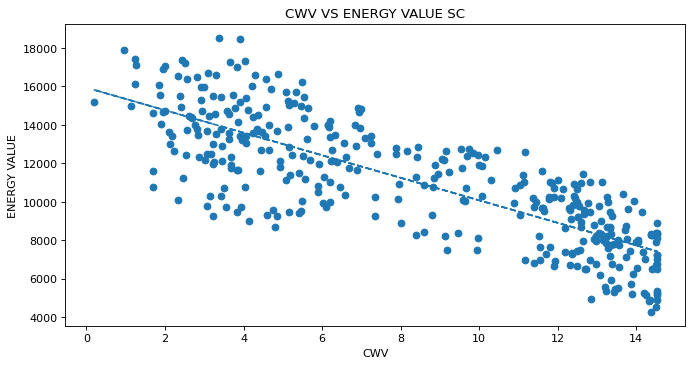

In [69]:
x = cwv_daily
y = ev_daily
figure(figsize=(10, 5), dpi=80)
plt.scatter(x,y)
plt.title("CWV VS ENERGY VALUE SC")
plt.xlabel("CWV")
plt.ylabel("ENERGY VALUE")
# finding linear regression values and plotting them on scatter plot
rt_slope,rt_int,rt_r,rt_p,rt_std_err = st.linregress(x,y)
rt_fit = rt_slope*x + rt_int
#plotting
plt.plot(x,rt_fit,"--")
plt.savefig('plot_images/CWV Vs Energy_Value sc')
plt.show()

### Relation between ENERGY VALUE VS ANNUAL USAGE

In [46]:
#finding average value to plot
ev_annual = grouped_sc.groupby('SITE_REFERENCE')['ENERGY_VALUE'].sum()
usage_annual = grouped_sc.groupby('SITE_REFERENCE')['ANNUAL_USAGE'].mean()
print(f"Correlation factor for ENERGY VALUE VS ANNUAL USAGE is {ev_annual.corr(usage_annual,method= 'pearson')} \
indicating a strong correaltion between the two same can be seen in the plot below")

Correlation factor for ENERGY VALUE VS ANNUAL USAGE is 0.9892948026917135 indicating a strong correaltion between the two same can be seen in the plot below


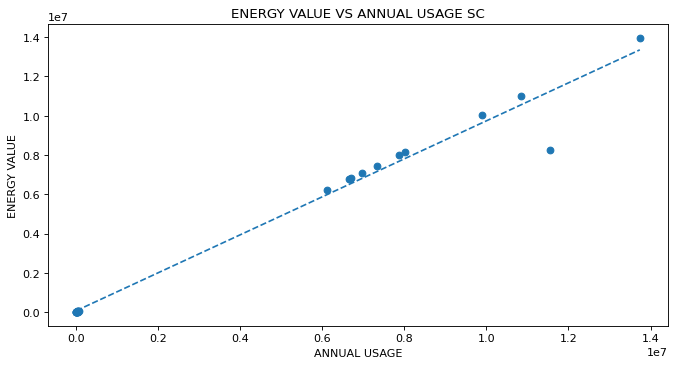

In [70]:
# plotting and findig line of regression 
y_an = ev_annual
x_an = usage_annual
figure(figsize=(10, 5), dpi=80)
plt.scatter(x_an,y_an)
plt.title("ENERGY VALUE VS ANNUAL USAGE SC")
plt.xlabel("ANNUAL USAGE")
plt.ylabel("ENERGY VALUE")
# finding linear regression values and plotting them on scatter plot
rt_slope,rt_int,rt_r,rt_p,rt_std_err = st.linregress(x_an,y_an)
rt_fit = rt_slope*x_an + rt_int
#plotting
plt.plot(x_an,rt_fit,"--")
plt.savefig('plot_images/ENERGY VALUE VS ANNUAL USAGE SC.png')
plt.show()

### Relation between CWV VS ANNUAL USAGE

As the data provided has CWV for daily value but usage provided is only annual an analysis to find a realtion between the two could not be performed. There is not enough data that can be used to see the correaltion.


## West Midlands 

### Relation between CWV Vs Energy_Value 

In [48]:
#uisng the same dataframe as above for westmidlamds grouped_wm
ev_daily1 = grouped_wm.groupby('GAS_FLOW_DAY')['ENERGY_VALUE'].mean()
cwv_daily1 = grouped_wm.groupby('GAS_FLOW_DAY')['CWV'].mean()
print(f"Correlation factor for CWV Vs Energy_Value is {ev_daily1.corr(cwv_daily1,method = 'pearson')} \
indicating a strong neagtive correaltion between the two same can be seen in the plot below")

Correlation factor for CWV Vs Energy_Value is -0.8385483246713942 indicating a strong neagtive correaltion between the two same can be seen in the plot below


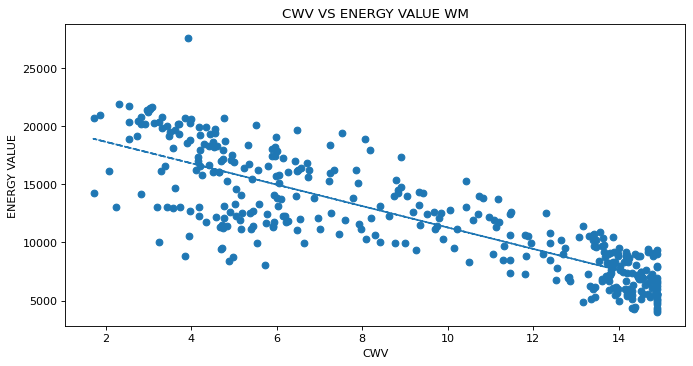

In [78]:
#plotting and finding line of regression 
x_wm= cwv_daily1
y_wm = ev_daily1
figure(figsize=(10, 5), dpi=80)
plt.scatter(x_wm,y_wm)
plt.title("CWV VS ENERGY VALUE WM")
plt.xlabel("CWV")
plt.ylabel("ENERGY VALUE")
# finding linear regression values and plotting them on scatter plot
rt_slope,rt_int,rt_r,rt_p,rt_std_err = st.linregress(x_wm,y_wm)
rt_fit = rt_slope*x_wm + rt_int
#plotting
plt.plot(x_wm,rt_fit,"--")
plt.savefig('plot_images/CWV Vs Energy_Value wm.png')
plt.show()


### Relation between ENERGY VALUE VS ANNUAL USAGE

In [50]:
ev_annual1 = grouped_wm.groupby('SITE_REFERENCE')['ENERGY_VALUE'].sum()
usage_annual1 = grouped_wm.groupby('SITE_REFERENCE')['ANNUAL_USAGE'].mean()
print(f"Correlation factor for ENERGY VALUE VS ANNUAL USAGE is {ev_annual1.corr(usage_annual1,method= 'pearson')} \
indicating a strong correaltion between the two same can be seen in the plot below")

Correlation factor for ENERGY VALUE VS ANNUAL USAGE is 0.9998382492947824 indicating a strong correaltion between the two same can be seen in the plot below


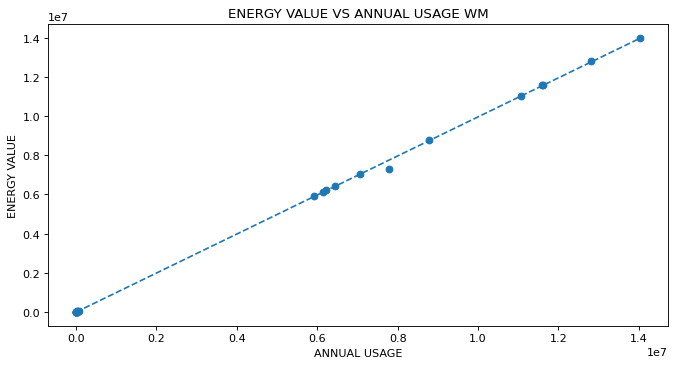

In [79]:
#plotting and finding line of regression 
y_wm1= ev_annual1
x_wm1 = usage_annual1
figure(figsize=(10, 5), dpi=80)
plt.scatter(x_wm1,y_wm1)
plt.title("ENERGY VALUE VS ANNUAL USAGE WM")
plt.ylabel("ENERGY VALUE")
plt.xlabel("ANNUAL USAGE")
# finding linear regression values and plotting them on scatter plot
rt_slope,rt_int,rt_r,rt_p,rt_std_err = st.linregress(x_wm1,y_wm1)
rt_fit = rt_slope*x_wm1 + rt_int
#plotting
plt.plot(x_wm1,rt_fit,"--")
plt.savefig('plot_images/ENERGY VALUE VS ANNUAL USAGE WM')
plt.show()


### Relation between CWV VS ANNUAL USAGE

As the data provided has CWV for daily value but usage provided is only annual an analysis to find a realtion between the two could not be performed. There is not enough data that can be used to see the correaltion.